In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from subprocess import check_output
print(check_output(['ls', '../input']).decode("utf8"))

# Any results you write to the current directory are saved as output.

MedianHouseholdIncome2015.csv
PercentOver25CompletedHighSchool.csv
PercentagePeopleBelowPovertyLevel.csv
PoliceKillingsUS.csv
ShareRaceByCity.csv



In [11]:
median_house_hold_in_come = pd.read_csv('../input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('../input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('../input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('../input/PoliceKillingsUS.csv', encoding="windows-1252")

In [12]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [17]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [18]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [19]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [20]:
#Poverty rate of each state
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [24]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace=True)

In [25]:
percentage_people_below_poverty_level.poverty_rate=percentage_people_below_poverty_level.poverty_rate.astype(float)     

In [27]:
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())

In [29]:
area_poverty_ratio=[]
for i in area_list:
    x=percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

In [31]:
data = pd.DataFrame({'area_list' : area_list, 'area_poverty_ratio' : area_poverty_ratio})
new_index=(data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data=data.reindex(new_index)

Text(0.5, 1.0, 'Poverty rate given States')

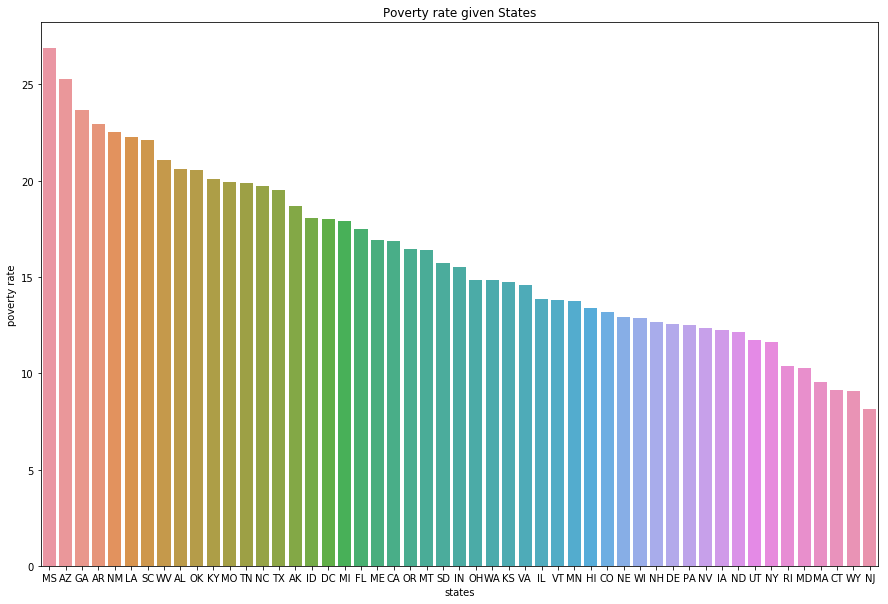

In [36]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xlabel('states')
plt.ylabel('poverty rate')
plt.title('Poverty rate given States')

In [35]:
data.head()

,area_list,area_poverty_ratio
0,AL,20.611795
1,AK,18.678592
2,AZ,25.268071
3,AR,22.963216
4,CA,16.888371


In [37]:
kill.name.value_counts()

TK TK                        49
Brandon Jones                 2
TK Tk                         2
Daquan Antonio Westbrook      2
Michael Johnson               2
Eric Harris                   2
Michael Brown                 2
David Klassen                 1
Joseph Newcomb                1
Oscar Reyes                   1
Raul Herrera                  1
Preston Paul Perez            1
Joseph William Alain          1
Marcus Golden                 1
Mario Martinez Torres         1
Casimero Carlos Casillas      1
Javier Lopez Garcia           1
Joel A. Gonzales              1
Charles Reynolds              1
Bryant Neil Duncan            1
Jeff Robertson                1
Luis Michael Hoff             1
Austin Goodner                1
Jonathan Efraim               1
Joel Fabela                   1
Mark Allan Smith              1
Jeremy J. Sinclair            1
Bartolo Justice Sambrano      1
Deveonte Johnson              1
Richard Matt                  1
                             ..
Raul Saa

In [38]:
#Most Common 15 Name or Surname of killed person
separate = kill.name[kill.name != 'TK TK'].str.split()
a,b = zip(*separate)
name_list = a+b
name_count=Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x),list(y)

Text(0.5, 1.0, 'most common 15 name or surname of killed person')

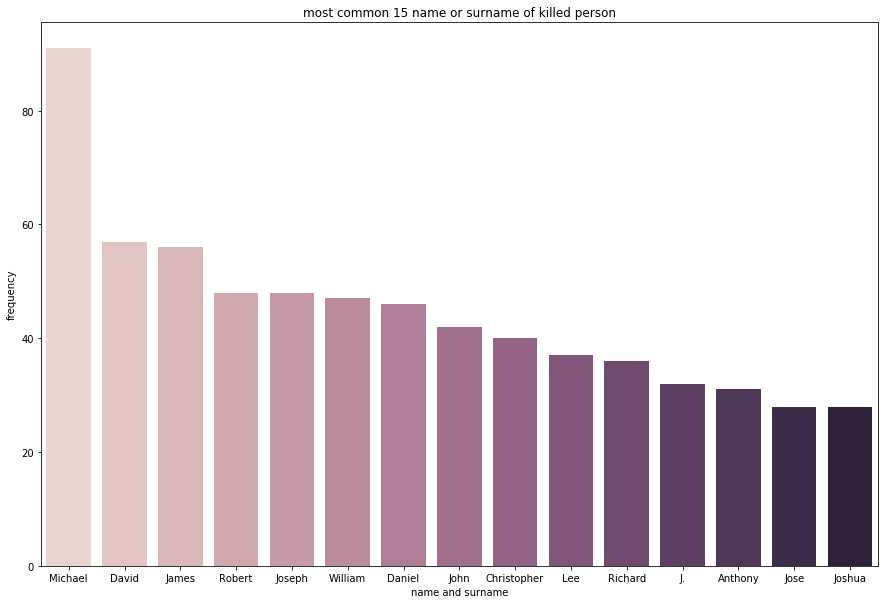

In [40]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=x,y=y,palette=sns.cubehelix_palette(len(x)))
plt.xlabel("name and surname")
plt.ylabel("frequency")
plt.title("most common 15 name or surname of killed person")

In [89]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic

In [90]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [92]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [91]:
share_race_city.replace(['-'],0.0,inplace=True)

In [93]:
share_race_city.replace(['(X)'],0.0,inplace=True)

In [94]:
share_race_city.loc[:,["share_white", "share_black", "share_native_american","share_asian","share_hispanic"]].astype(float)              

,share_white,share_black,share_native_american,share_asian,share_hispanic
0,67.2,30.2,0.0,0.0,1.6
1,54.4,41.4,0.1,1.0,3.1
2,52.3,44.9,0.5,0.3,2.3
3,99.1,0.1,0.0,0.1,0.4
4,13.2,86.5,0.0,0.0,0.3
5,79.4,13.5,0.4,0.9,9.0
6,75.9,1.9,0.8,0.5,27.9
7,62.2,32.0,0.2,0.9,4.8
8,87.4,10.2,0.3,0.5,0.9
9,22.6,74.9,0.1,0.0,1.2


In [95]:
area_list = list(share_race_city['Geographic area'].unique())

In [96]:
area_list

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [98]:
share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]

In [116]:
for i in area_list:
    x=share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white.astype(float))/len(x))
    share_black.append(sum(x.share_black.astype(float))/len(x))
    share_native_american.append(sum(x.share_native_american.astype(float))/len(x))
    share_asian.append(sum(x.share_asian.astype(float))/len(x))
    share_hispanic.append(sum(x.share_hispanic.astype(float))/len(x))


[Text(0, 0.5, 'states'),
 Text(0.5, 0, 'percentage of races'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

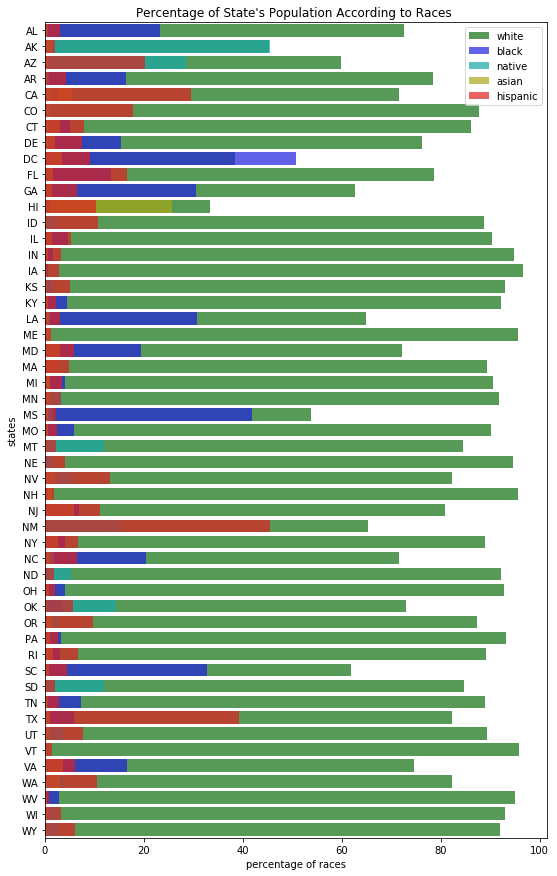

In [118]:
#visualization
f,ax = plt.subplots(figsize=(9,15))
sns.barplot(x=share_white,y=area_list,color='g',label='white',alpha=0.7)
sns.barplot(x=share_black,y=area_list,color='b',label='black',alpha=0.7)
sns.barplot(x=share_native_american,y=area_list,color='c',label='native',alpha=0.7)
sns.barplot(x=share_asian,y=area_list,color='y',label='asian',alpha=0.7)
sns.barplot(x=share_hispanic,y=area_list,color='r',label='hispanic',alpha=0.7)

ax.legend(loc='best',frameon=True)#frameon=visibility of frame
ax.set(xlabel='percentage of races', ylabel='states',
       title="Percentage of State's Population According to Races ")
